In [14]:
from iqoptionapi.stable_api import IQ_Option
import logging, sys, time, configparser
from talib.abstract import ATR, EMA
import numpy as np
import pandas as pd
from datetime import date
from csv import writer

def login(verbose = False, iq = None, checkConnection = False):
    
    if verbose:
        logging.basicConfig(level=logging.DEBUG,format='%(asctime)s %(message)s')

    if iq == None:
      print("Trying to connect to IqOption")
      iq=IQ_Option('@gmail.com','Pass') # YOU HAVE TO ADD YOUR USERNAME AND PASSWORD
      iq.connect()

    if iq != None:
      while True:
        if iq.check_connect() == False:
          print('Error when trying to connect')
          print(iq)
          print("Retrying")
          iq.connect()
        else:
          if not checkConnection:
            print('Successfully Connected!')
          break
        time.sleep(3)

    iq.change_balance("PRACTICE") #or real
    return iq

def higher(iq,Money,Actives):
    
    done,id = iq.buy(Money,Actives,"call",1)
    print(Money, id)
    if not done:
        print('Error call')
        print(done, id)
        exit(0)
    
    return id


def lower(iq,amount,pair):
    
    done,id = iq.buy(amount,pair,"put",1)
    print(amount, id)
    
    if not done:
        print('Error put')
        print(done, id)
        exit(0)
    
    return id

def atr(values, period):
    return ATR(values['high'], values['low'], values['close'],period)

def ema(values, period, offset):
    ema = EMA(values['close'], timeperiod=period)
def keltner(values, period, offset):
    ema = EMA(values['close'], timeperiod=period)
    upperb = ema + offset * atr(values, period)
    lowerb = ema - offset * atr(values, period)
    return upperb, lowerb, ema

def get_candles(pair, candle_freq):
    candles = API.get_realtime_candles(pair, candle_freq)
    values = {'open': np.array([]), 
                  'high': np.array([]), 
                  'low': np.array([]), 
                  'close': np.array([]), 
                  'volume': np.array([]) }
        
        
    for x in candles:
        values['open'] = np.append(values['open'], candles[x]['open'])
        values['high'] = np.append(values['high'], candles[x]['max'])
        values['low'] = np.append(values['low'], candles[x]['min'])
        values['close'] = np.append(values['close'], candles[x]['close'])
        values['volume'] = np.append(values['volume'], candles[x]['volume'])

    df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in values.items() ]))
    return df, values

logging.disable(level=(logging.DEBUG))


API = IQ_Option("@gmail.com", 'Pass')
API.connect()

API.change_balance('PRACTICE') # PRACTICE / REAL

if API.check_connect():
    print('\n\nSuccessful connection')
else:
    print('\n Error connecting')
    sys.exit()


pair = 'EURUSD-OTC'
amount = 10

period_EMA2 = 25
candle_timeframe = 60
num_candles_to_save = 60
API.start_candles_stream(pair, candle_timeframe, num_candles_to_save)

if_mid_way = None
if_upperb = None

GupperB = False
LlowerB = False

trade = False

df, values = get_candles(pair, candle_timeframe) 



Successful connection


In [1]:
from google.oauth2 import service_account
from googleapiclient.discovery import build

SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
SERVICE_ACCOUNT_FILE = 'C:/Users/HP/Desktop/Binary_bots/binary-bot-master/key.json'

creds = None
creds = service_account.Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE, scopes=SCOPES)

ID = ''
service = build('sheets', 'v4', credentials=creds)

data = [["31/12/2021", "21:28:01", "['loose']", "10", "11405.5"]]
result = service.spreadsheets().values().append(
    spreadsheetId=ID, range="Sheet1!A1:E1",
    valueInputOption="USER_ENTERED", insertDataOption="INSERT_ROWS", body = {"values":data}).execute()


In [103]:
data = [["31/12/2021", "21:28:01", "['loose']", "10", "11405.5"]]
result = service.spreadsheets().values().append(
    spreadsheetId=ID, range="Sheet1!A1:E1",
    valueInputOption="USER_ENTERED", insertDataOption="INSERT_ROWS", body = {"values":data}).execute()

In [15]:
name="live-deal-binary-option-placed"
active="EURUSD"
_type="turbo"#"turbo"/"binary"
data=(API.get_live_deal(name,active,_type))

In [20]:
from iqoptionapi.stable_api import IQ_Option
import logging
import time

#logging.basicConfig(level=logging.DEBUG,format='%(asctime)s %(message)s')
Iq=IQ_Option("@gmail.com","Pass")
Iq.connect()#connect to iqoption
while_run_time=10

#For binary option
name="live-deal-binary-option-placed"
active="EURUSD-OTC"
_type="turbo"#"turbo"/"binary"
buffersize=10#
print("_____________subscribe_live_deal_______________")
print("\n\n")
Iq.subscribe_live_deal(name,active,_type,buffersize)

last_trade_data=Iq.get_live_deal(name,active,_type)[0]

user_id=last_trade_data["user_id"]
counutry_id=last_trade_data["country_id"]
print("_______get_user_profile_client__________")
print(Iq.get_user_profile_client(user_id))
pro_data=Iq.get_user_profile_client(user_id)
print("\n\n")

print("___________request_leaderboard_userinfo_deals_client______")
print(Iq.request_leaderboard_userinfo_deals_client(user_id,counutry_id))
user_data=Iq.request_leaderboard_userinfo_deals_client(user_id,counutry_id)
worldwide=user_data["result"]["entries_by_country"]["0"]["position"]
profit=user_data["result"]["entries_by_country"]["0"]["score"]
print("\n")
print("user_name:"+pro_data["user_name"])
print("This week worldwide:"+str(worldwide))
print("This week's gross profit:"+str(profit))
print("\n\n")

_____________subscribe_live_deal_______________





IndexError: deque index out of range

In [31]:
df.tail()

,open,close,target,SMA2,SMA5
275,0.926007,0.925858,down,0.925933,0.926293
276,0.925831,0.925767,down,0.925813,0.926101
277,0.925767,0.925868,up,0.925818,0.925946
278,0.925872,0.926035,up,0.925952,0.925907
279,0.926035,0.925951,down,0.925993,0.925896


In [11]:
df = df.drop(columns = ["high",'low', "volume"])

df

,open,close
0,0.932299,0.932118
1,0.932114,0.931881
2,0.931878,0.931653
3,0.931653,0.931415
4,0.931397,0.931511
...,...,...
275,0.926007,0.925858
276,0.925831,0.925767
277,0.925767,0.925868
278,0.925872,0.926035


In [48]:
df['target'] = np.where((df['close'] - df['open'])>0, '1', '0')
df['target'] = df['target'].astype(str).astype(int)
df = df[["target", "open", "close"]]
df.head()

,target,open,close
0,0,0.932299,0.932118
1,0,0.932114,0.931881
2,0,0.931878,0.931653
3,0,0.931653,0.931415
4,1,0.931397,0.931511


In [14]:
from talib.abstract import *

In [50]:
df['SMA2'] = SMA(df['close'], timeperiod=2)
df['SMA5'] = SMA(df['close'], timeperiod=5)
df

,target,open,close,SMA2,SMA5
0,0,0.932299,0.932118,NaN,NaN
1,0,0.932114,0.931881,0.931999,NaN
2,0,0.931878,0.931653,0.931767,NaN
3,0,0.931653,0.931415,0.931534,NaN
4,1,0.931397,0.931511,0.931463,0.931716
...,...,...,...,...,...
275,0,0.926007,0.925858,0.925933,0.926293
276,0,0.925831,0.925767,0.925813,0.926101
277,1,0.925767,0.925868,0.925818,0.925946
278,1,0.925872,0.926035,0.925952,0.925907


          target      open     close      SMA2      SMA5
target  1.000000 -0.020030  0.038011  0.012833  0.000636
open   -0.020030  1.000000  0.997456  0.999356  0.998352
close   0.038011  0.997456  1.000000  0.999367  0.996569
SMA2    0.012833  0.999356  0.999367  1.000000  0.998105
SMA5    0.000636  0.998352  0.996569  0.998105  1.000000


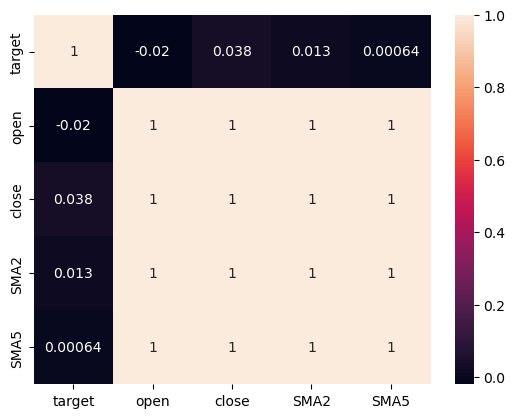

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df.corr())
sns.heatmap(df.corr(), annot = True)
plt.show()